# Clickbait Titles
______________________

# Part 1 - EDA, Cleaning

### Riche Ngo

## Introduction

Clickbait titles are all over the internet and are becoming more and more relevant in our lives today. Most people take advantage of clickbait titles as a way of gaining more buzz for their posts and generating more dollars from ad revenue, and it has become so common that clickbait titles are socially accepted now. Inspired by a study has been carried out by [Chakraborty et al.](https://www.researchgate.net/publication/310809794_Stop_Clickbait_Detecting_and_preventing_clickbaits_in_online_news_media), this project explores the components that make up clickbait and non-clickbait titles.

In [77]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import pickle
import gzip

from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Import data

The data contains titles and headlines for both clickbait and non-clickbait categories.
* **Non-clickbait:** The titles of news stories from a corpus of 16,000 Wikinews articles collected by News-Reader application.
* **Clickbait:** 16,000 articles from BuzzFeed, Upworthy, ViralNova, Thatscoop, Scoopwhoop and ViralStories.

In [11]:
### Load the clickbait data
with gzip.open('../datasets/clickbait_headlines/clickbait_data.gz', 'rt', encoding="utf-8") as f:
    lines = [line.rstrip() for line in f]
    clickbait_data = list([line for line in lines if line])
    
        
# total length of list, this number equals total number of reviews
print(len(clickbait_data))

# first row of the list
print(clickbait_data[10])

15999
16 Perfect Responses To The Indian Patriarchy


In [12]:
### Load the non-clickbait data
with gzip.open('../datasets/clickbait_headlines/non_clickbait_data.gz', 'rt', encoding="utf-8") as f:
    lines = [line.rstrip() for line in f]
    non_clickbait_data = list([line for line in lines if line])
    
        
# total length of list, this number equals total number of reviews
print(len(non_clickbait_data))

# first row of the list
print(non_clickbait_data[10])

16001
With Troubled Coyotes, Gretzky Called On as Savior Again


In [16]:
# Put the data into a dataframe
# include column to indicate label
df_cb = pd.DataFrame(clickbait_data, columns=['title'])
df_cb['clickbait'] = 1

df_ncb = pd.DataFrame(non_clickbait_data, columns=['title'])
df_ncb['clickbait'] = 0

# Merge
df = pd.concat([df_cb, df_ncb], ignore_index=True).reset_index(drop=True)

In [19]:
df

,title,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [22]:
# Check for null
df.isnull().sum()

title        0
clickbait    0
dtype: int64

In [23]:
# Check for duplicates
df[df.duplicated()]

,title,clickbait


In [20]:
# Save dataframe as .pkl
outfile = open('../datasets/clickbait_headlines/clickbait_df.pkl','wb')
pickle.dump(df, outfile)
outfile.close()

## Preprocessing

Before we proceed with EDA and feature engineering, it is good to process the textual data so that the analysis is more accurate. We want to make all title lowercase, remove the punctuations, and remove the additional white spaces.

In [75]:
# Function to preprocess text
def preprocess_text(text):
    result = text.replace('/', '').replace('\n', '')
    result = re.sub(r'[1-9]+', 'number', result)   # numbers will be replaced with the word 'number'
    result = re.sub(r'(\w)(\1{2,})', r'\1', result)
    result = re.sub(r'(?x)\b(?=\w*\d)\w+\s*', '', result)
    result = ''.join(t for t in result if t not in punctuation)
    result = re.sub(r' +', ' ', result).lower().strip()
    return result

In [78]:
# Preprocessing
df['title'] = df['title'].map(preprocess_text)

## EDA & Feature Engineering

We want to explore the textual data and engineer new features along the way.

### Word Frequencies

In [52]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud, interpolation='bilinear') 
    # No axis details
    plt.axis("off");

# Function to extract top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return pd.DataFrame(words_freq[:n], columns=['words', 'count']).set_index('words')

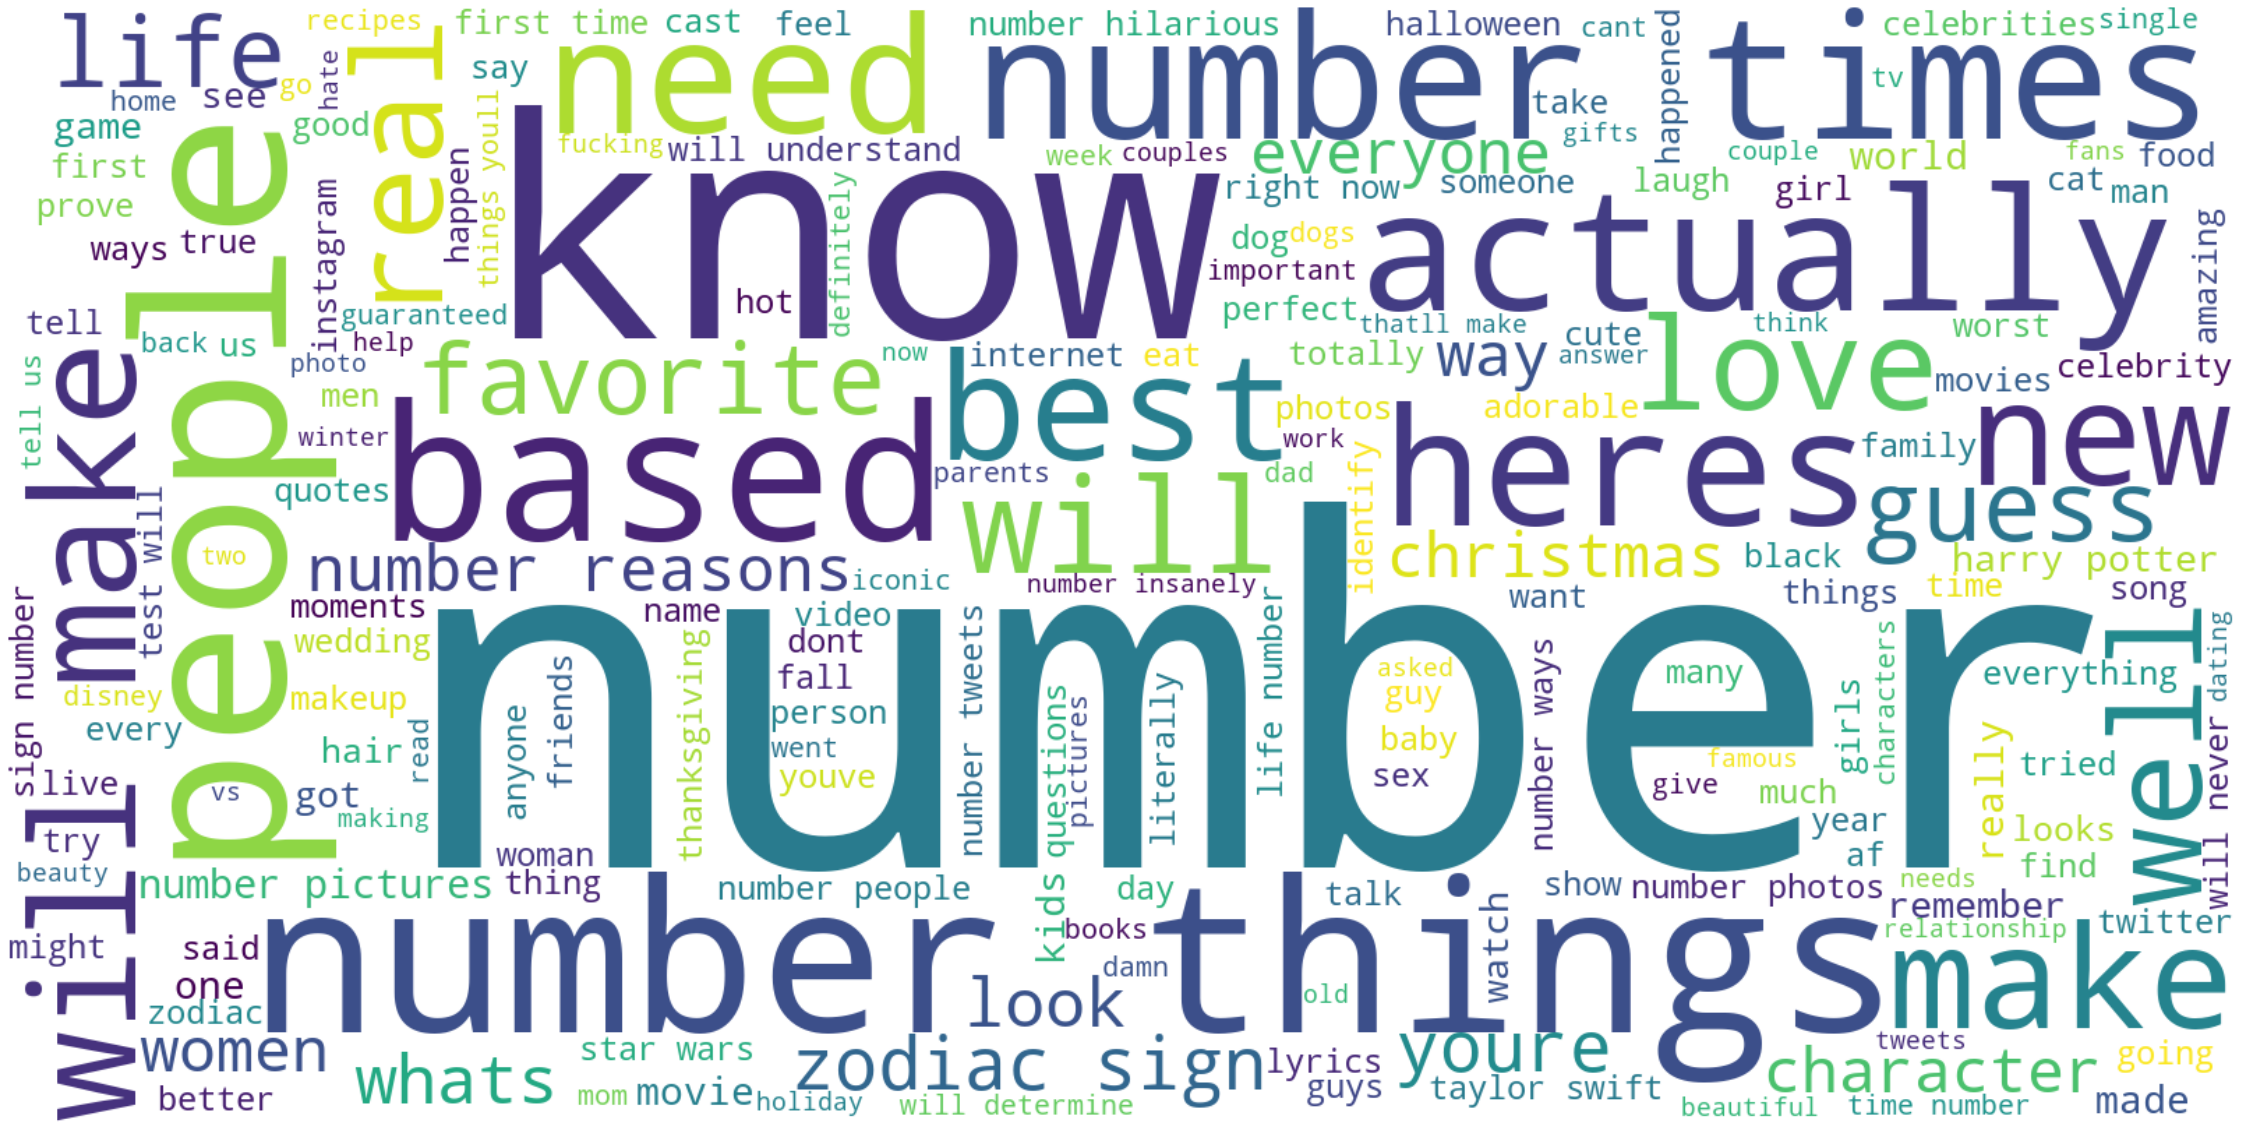

In [79]:
# Plotting wordcloud for clickbait titles
text = " ".join(df.loc[df['clickbait']==1, 'title'])
wordcloud = WordCloud(background_color="white", width=1600, height=800, normalize_plurals=False).generate(text)

# Plot
plot_cloud(wordcloud)

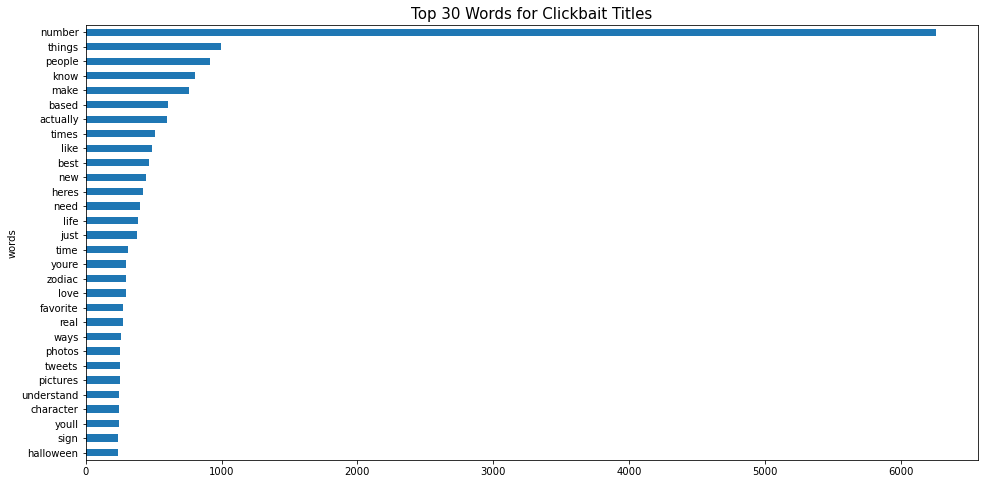

In [80]:
# Convert word frequency into dataframe
words_cb = get_top_n_words(df.loc[df['clickbait']==1, 'title'], 30)

# Visualize top 30 words using bar plot
words_cb.plot(kind='barh', figsize=(16,8))
plt.gca().invert_yaxis()
plt.title('Top 30 Words for Clickbait Titles', fontsize=15)
plt.legend().remove();

INSERT COMMENTS

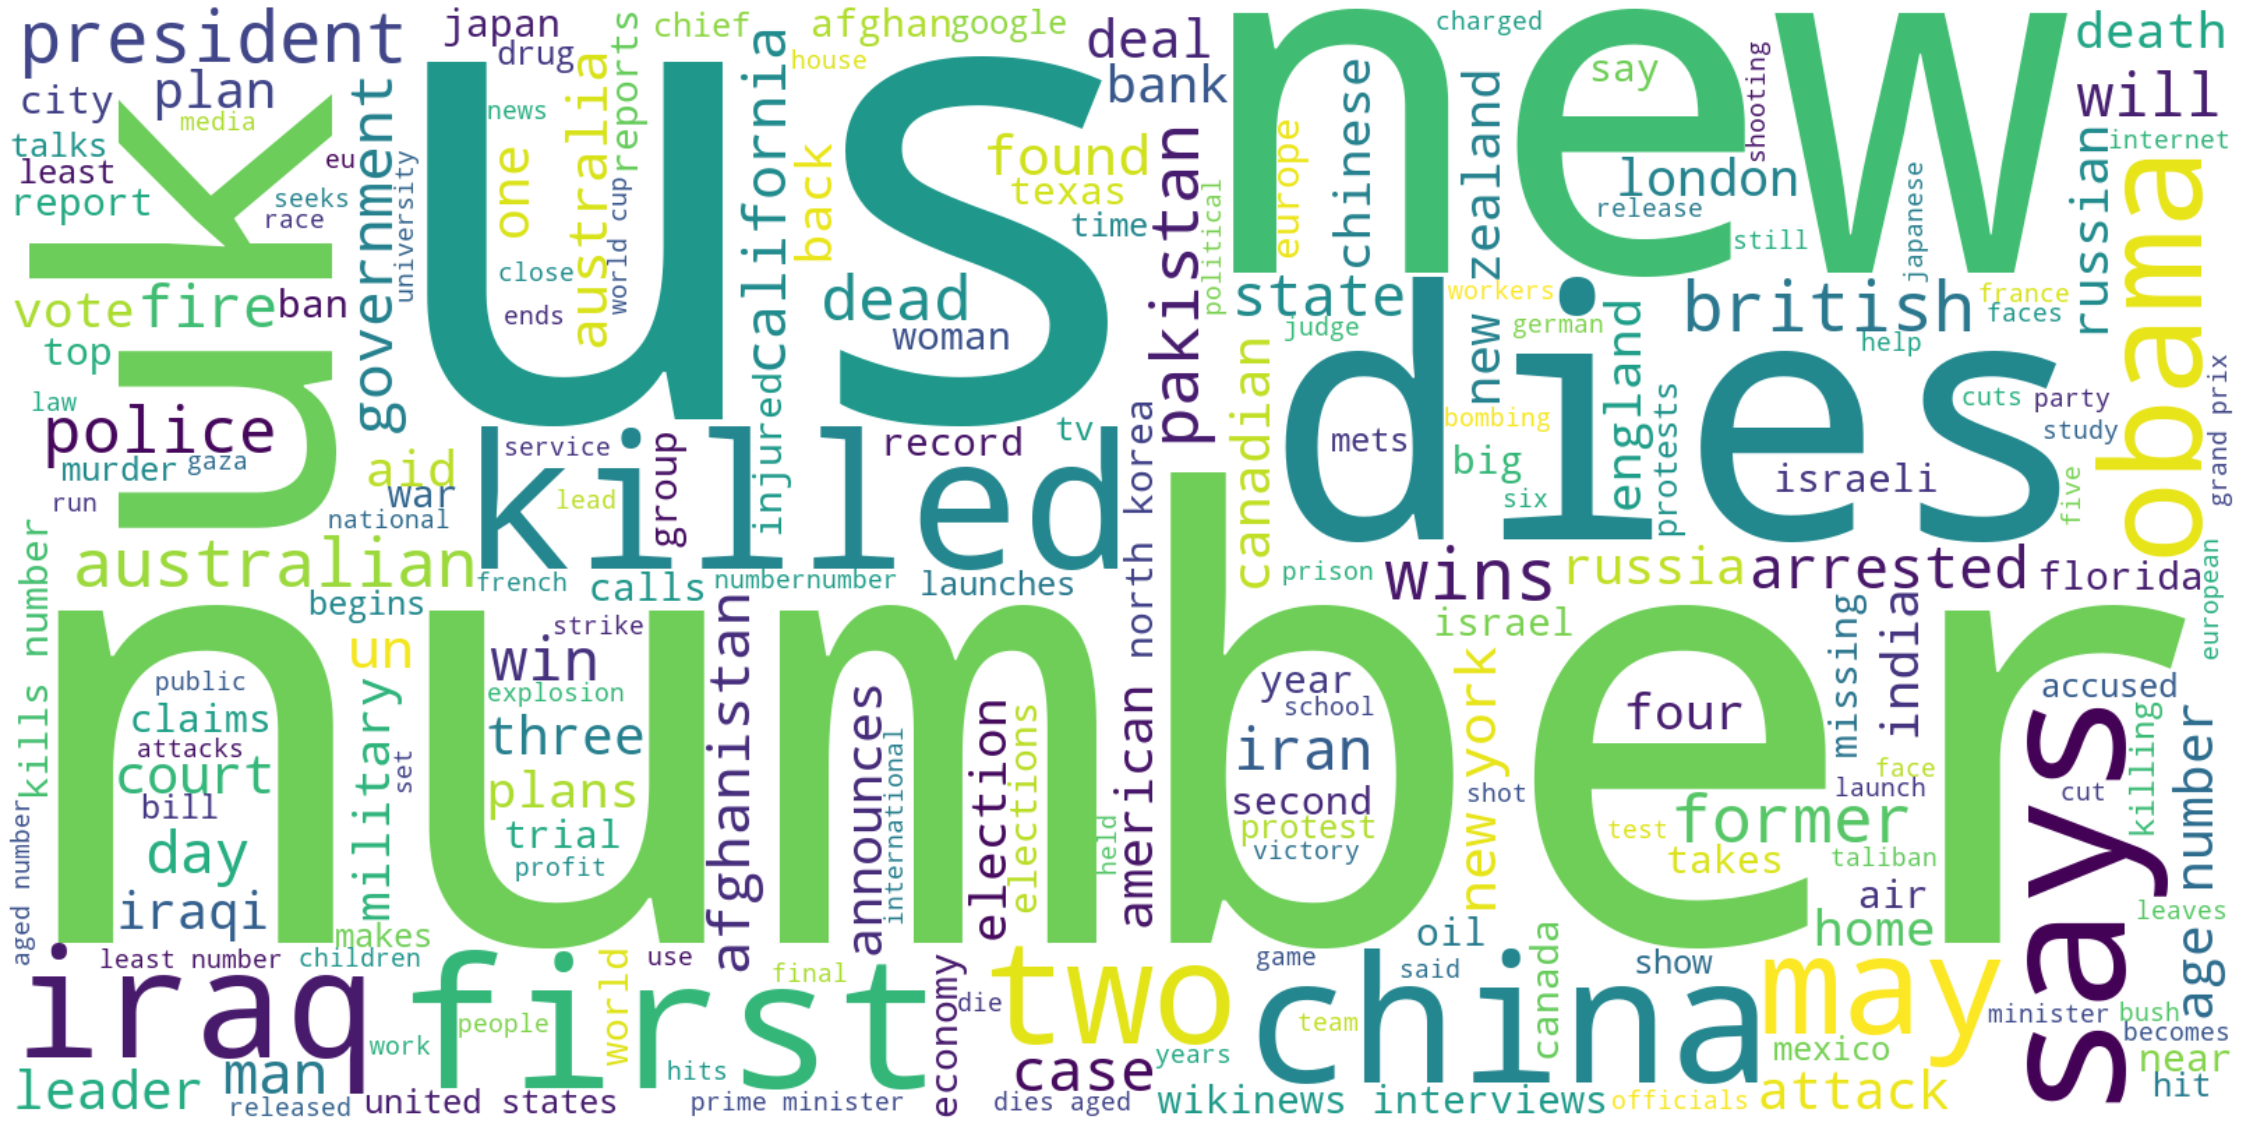

In [81]:
# Plotting wordcloud for clickbait titles
text = " ".join(df.loc[df['clickbait']==0, 'title'])
wordcloud = WordCloud(background_color="white", width=1600, height=800, normalize_plurals=False).generate(text)

# Plot
plot_cloud(wordcloud)

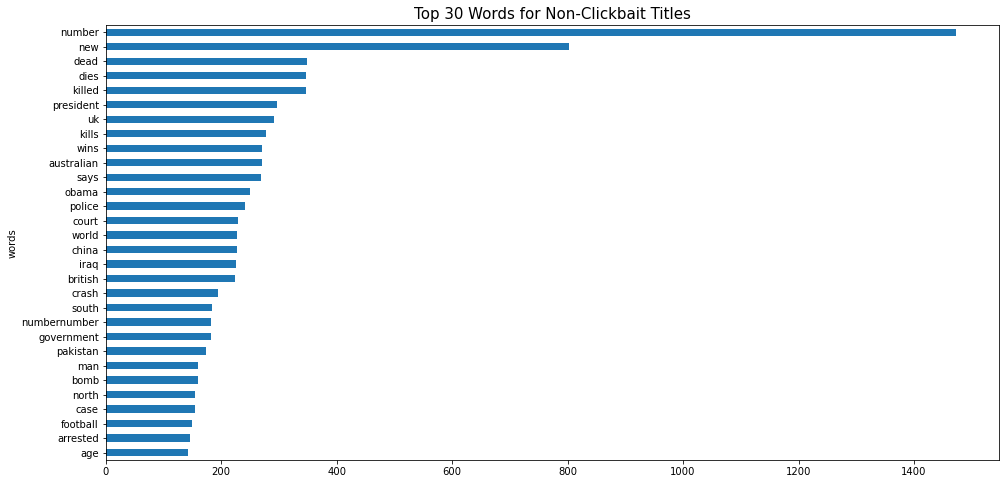

In [82]:
# Convert word frequency into dataframe
words_ncb = get_top_n_words(df.loc[df['clickbait']==0, 'title'], 30)

# Visualize top 30 words using bar plot
words_ncb.plot(kind='barh', figsize=(16,8))
plt.gca().invert_yaxis()
plt.title('Top 30 Words for Non-Clickbait Titles', fontsize=15)
plt.legend().remove();

INSERT COMMENTS

### Bigrams

In [49]:
# Function to extract top bigrams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return pd.DataFrame(words_freq[:n], columns=['bigrams', 'count']).set_index('bigrams')

In [83]:
# Extract the top 30 bigrams for clickbait and non-clickbait titles
bigrams_cb = get_top_n_bigram(df.loc[df['clickbait']==1, 'title'], 30)
bigrams_ncb = get_top_n_bigram(df.loc[df['clickbait']==0, 'title'], 30)

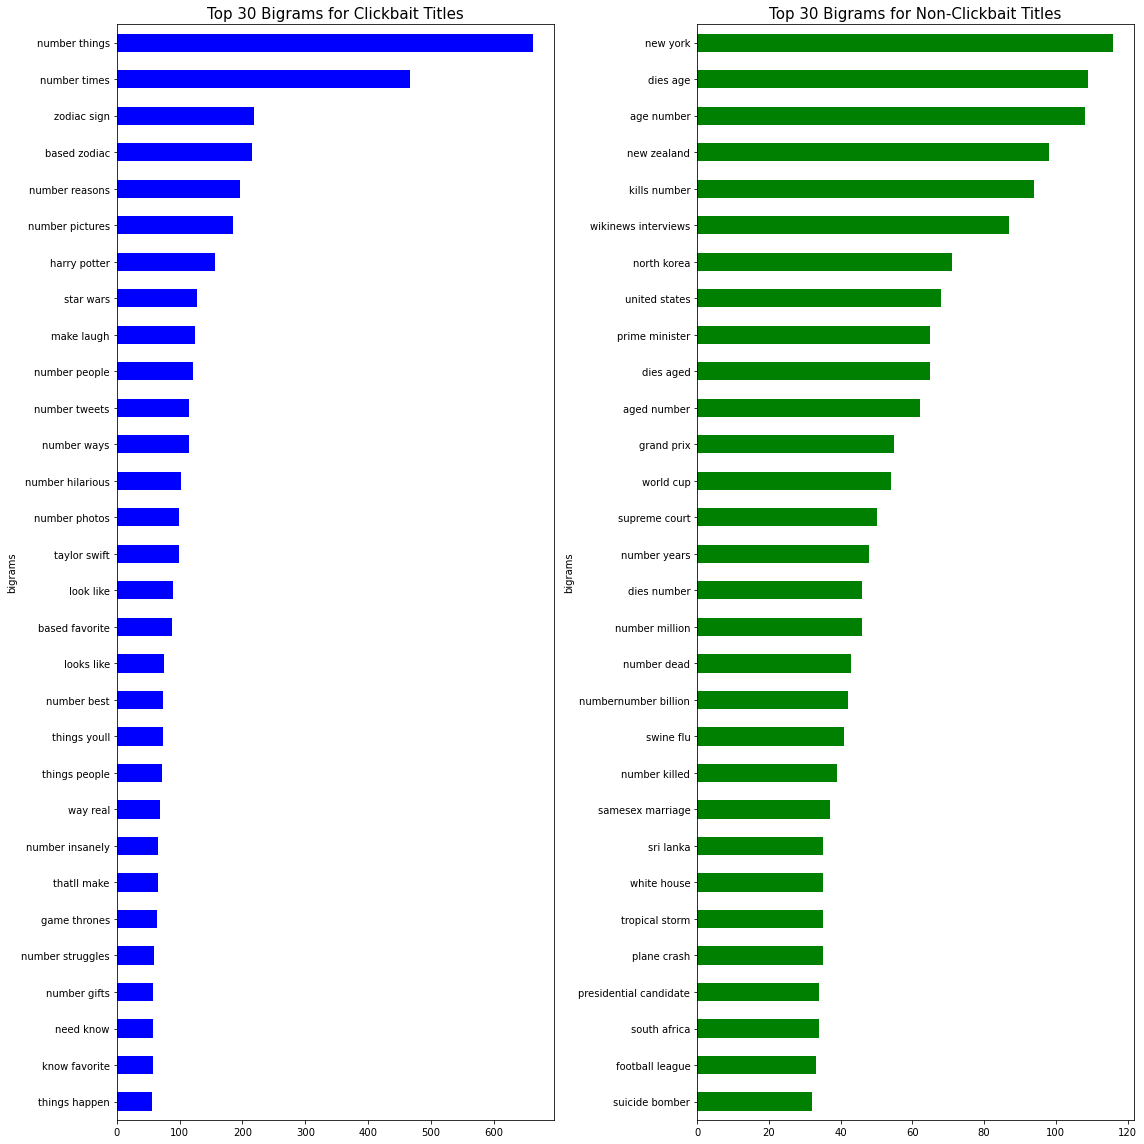

In [91]:
# Visualize top 30 bigrams using bar plot
fig, ax = plt.subplots(1, 2, figsize=(16, 16))

bigrams_cb.plot(kind='barh', ax=ax[0], color='b')
ax[0].invert_yaxis()
ax[0].set_title('Top 30 Bigrams for Clickbait Titles', fontsize=15)
ax[0].legend().remove()

bigrams_ncb.plot(kind='barh', ax=ax[1], color='g')
ax[1].invert_yaxis()
ax[1].set_title('Top 30 Bigrams for Non-Clickbait Titles', fontsize=15)
ax[1].legend().remove()

plt.tight_layout();

INSERT COMMENT

### Length of titles

In [85]:
# Create a column with title length
df['title_length'] = df['title'].map(lambda x: len(x.split()))
df['title_length'].describe()

count    32000.000000
mean         8.979188
std          2.603405
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         25.000000
Name: title_length, dtype: float64

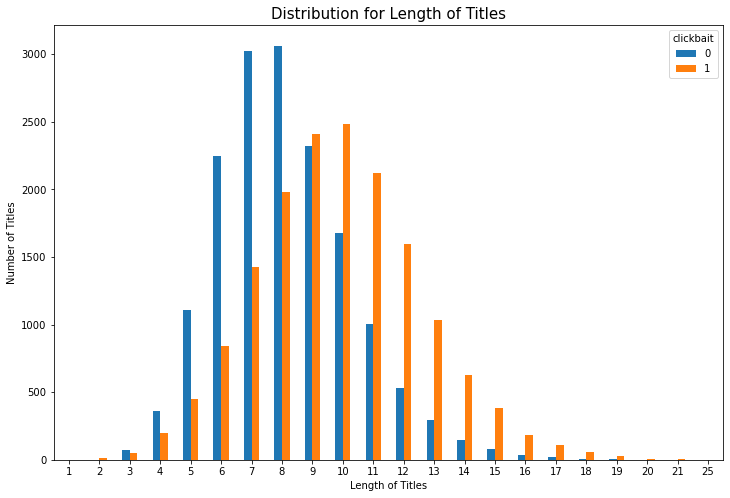

In [86]:
# Plot distribution for title lengths
plt.figure(figsize=(12,8))
ax = plt.gca()
df.groupby('title_length')['clickbait'].value_counts().unstack().plot.bar(ax=ax, rot=0)
plt.title('Distribution for Length of Titles', fontsize=15)
plt.xlabel('Length of Titles')
plt.ylabel('Number of Titles');

We observe that there is a clear distinction between the distributions for the length of titles of clickbait and non-clickbait titles. Moreover, the two distributions appear to be close to a normal distribution. This will be a good feature to keep for our machine learning model.

### Number of Stopwords

We want to make use of `nltk`'s stopwords library to count the number of stopwords for each title.

In [87]:
# Defining the stopwords list
stopwords_list = stopwords.words('english')

# Function to count number of stopwords
def count_stopwords(text):
    split_text = text.split()
    return len([word for word in split_text if word in stopwords_list])

In [88]:
# Create a column for number of stopwords in titles
df['num_stopwords'] = df['title'].map(count_stopwords)
df['num_stopwords'].describe()

count    32000.000000
mean         2.750281
std          1.851612
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         12.000000
Name: num_stopwords, dtype: float64

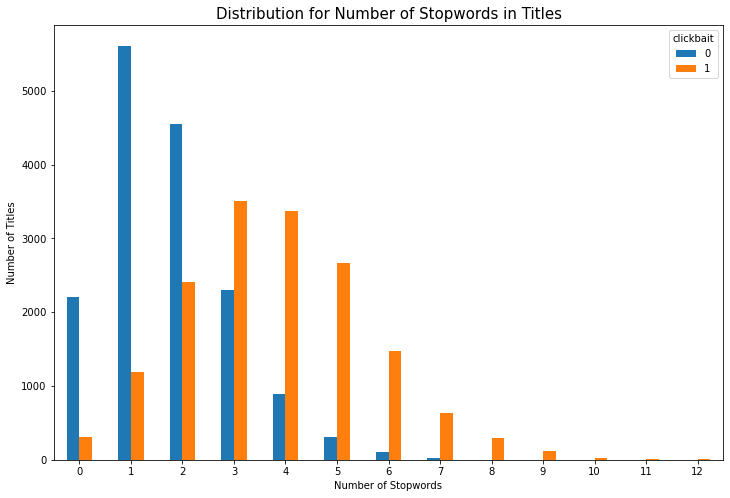

In [89]:
# Plot distribution for number of stopwords
plt.figure(figsize=(12,8))
ax = plt.gca()
df.groupby('num_stopwords')['clickbait'].value_counts().unstack().plot.bar(ax=ax, rot=0)
plt.title('Distribution for Number of Stopwords in Titles', fontsize=15)
plt.xlabel('Number of Stopwords')
plt.ylabel('Number of Titles');

We observe that there is a distinction between the distributions of the number of stopwords for clickbait and non-clickbait titles. Moreover, the two distributions appear to be close to a normal distribution. This will be a good feature to keep for our machine learning model.

### Correlation

Since the newly engineered features are numerical, we want to see the correlation between them and whether the title is clickbait or not.

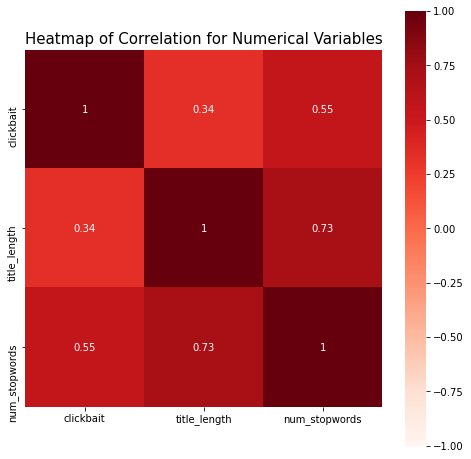

In [102]:
# Correlation heatmap

plt.subplots(figsize=(8,8))
plt.title('Heatmap of Correlation for Numerical Variables', fontsize=15)
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='Reds', square=True);

We observe some good correlation between the numerical variables and whether the title is clickbait or not.

#### Save as `.pkl` file

In [103]:
# Save dataframe as .pkl
outfile = open('../datasets/clickbait_headlines/clickbait_df_processed.pkl','wb')
pickle.dump(df, outfile)
outfile.close()